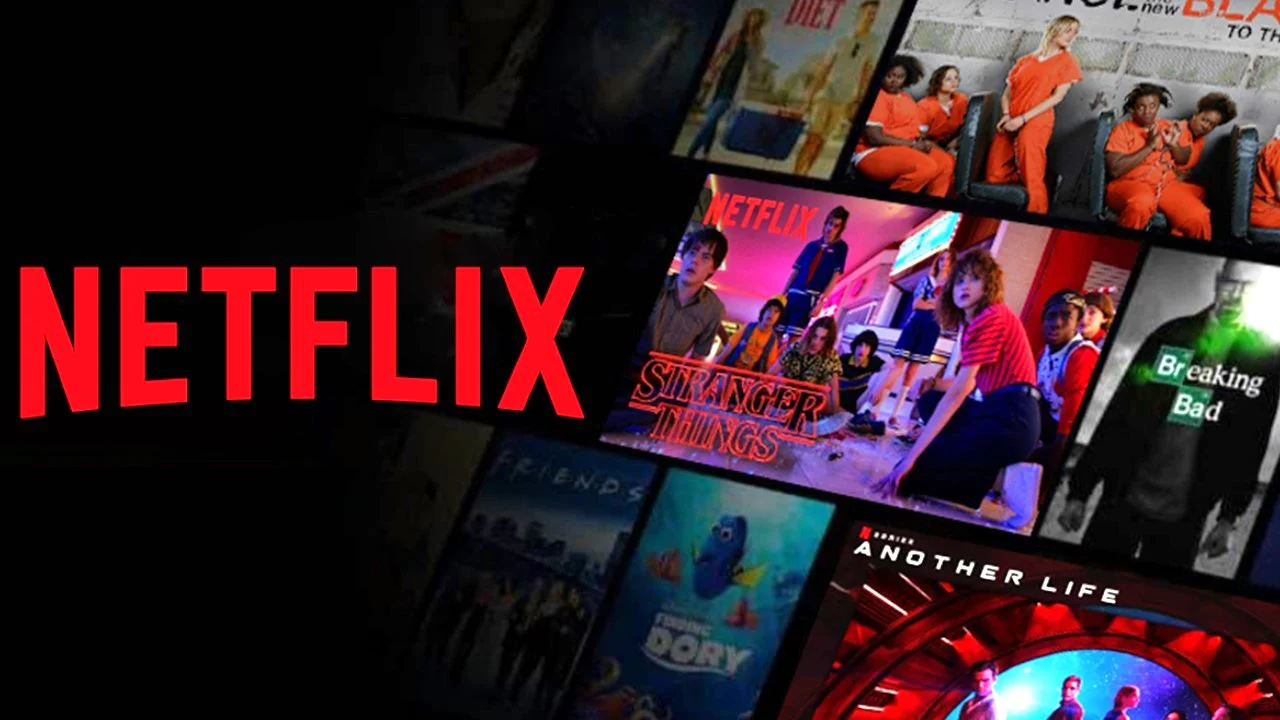

### Source : https://www.kaggle.com/datasets/shivamb/netflix-shows

# 0 - Imports 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from wordcloud import WordCloud

# 1- Load dataset

In [2]:
df = pd.read_csv("netflix.csv", encoding="utf-8")
df.head() #We can notice a column "show_id". I will define this column as index

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df = df.set_index('show_id')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 2 - EDA (Exploraty Data Analysis)

## Statistics

In [4]:
df.shape #8807 rows, 12 columns

(8807, 11)

In [5]:
df.info() #columns : type,title,director,cast,country,date_added,release_year,rating,duration,listed_in, description
#only released_year contains integers. The other columns are composed of objects.
# Note : date_added" is detected as objet. I will only convert this column to datetime.

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [6]:
df['date_added']= pd.to_datetime(df['date_added'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       7976 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8803 non-null   object        
 8   duration      8804 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 825.7+ KB


## columns - analysis

In [8]:
df.type.unique(), df.type.value_counts()

(array(['Movie', 'TV Show'], dtype=object),
 Movie      6131
 TV Show    2676
 Name: type, dtype: int64)

In [9]:
df.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [10]:
#top 20 countries : 
top_20_countries = df.country.value_counts().nlargest(20) 
top_20_countries

#This variable will facilitate the plotting in the next part (Data visualization)

United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
Name: country, dtype: int64

In [11]:
sorted(df.release_year.unique()) #release year from 1925 to 2021


[1925,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1954,
 1955,
 1956,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [12]:
df.rating.value_counts() #take off "mins" in the rating => corresponds to the duration I will transform it to NaN

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [30]:
df = df.replace({'rating':{"84 min":np.nan, "74 min":np.nan, "66 min":np.nan}})
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [13]:
df.listed_in

show_id
s1                                           Documentaries
s2         International TV Shows, TV Dramas, TV Mysteries
s3       Crime TV Shows, International TV Shows, TV Act...
s4                                  Docuseries, Reality TV
s5       International TV Shows, Romantic TV Shows, TV ...
                               ...                        
s8803                       Cult Movies, Dramas, Thrillers
s8804               Kids' TV, Korean TV Shows, TV Comedies
s8805                              Comedies, Horror Movies
s8806                   Children & Family Movies, Comedies
s8807       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [14]:
#https://www.kaggle.com/code/raniahossamelbadry/netflix-eda-plotly-time-series-analysis

# 3 Data visualization

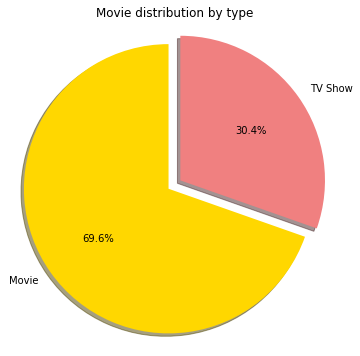

In [15]:
#type distribution - general
labels = df.type.unique().tolist()
sizes = df.type.value_counts().tolist()
colors = ['gold',  'lightcoral']
explode = (0, 0.1)

plt.figure(figsize=(6,6))
plt.title('Movie distribution by type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.savefig('PieChart02.png')
plt.show()

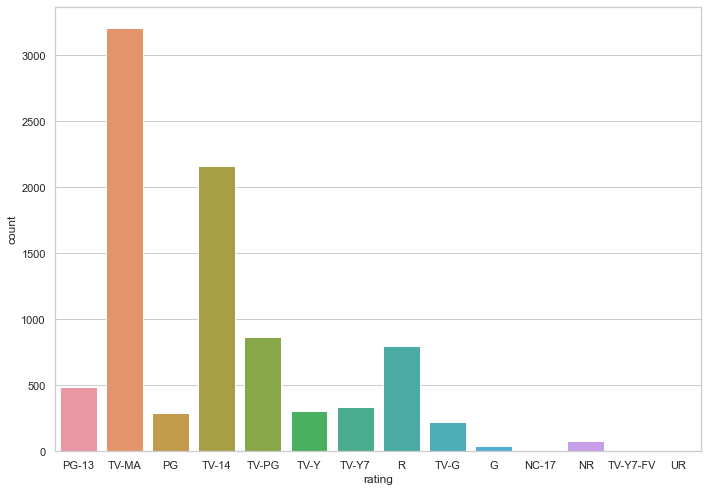

In [32]:
#type distribution - by rating

plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.countplot(x=df["rating"])
plt.tight_layout()
plt.show()

In [57]:
#type distribution - by genre
text = df.listed_in.to_string(index=False)
text

"show_id\n                                     Documentaries\n   International TV Shows, TV Dramas, TV Mysteries\nCrime TV Shows, International TV Shows, TV Acti...\n                            Docuseries, Reality TV\nInternational TV Shows, Romantic TV Shows, TV C...\n                TV Dramas, TV Horror, TV Mysteries\n                          Children & Family Movies\n  Dramas, Independent Movies, International Movies\n                      British TV Shows, Reality TV\n                                  Comedies, Dramas\nCrime TV Shows, Docuseries, International TV Shows\nCrime TV Shows, International TV Shows, TV Acti...\n                      Dramas, International Movies\n                Children & Family Movies, Comedies\n      British TV Shows, Crime TV Shows, Docuseries\n                            TV Comedies, TV Dramas\n               Documentaries, International Movies\nCrime TV Shows, Spanish-Language TV Shows, TV D...\n                                         Thrillers\nIn

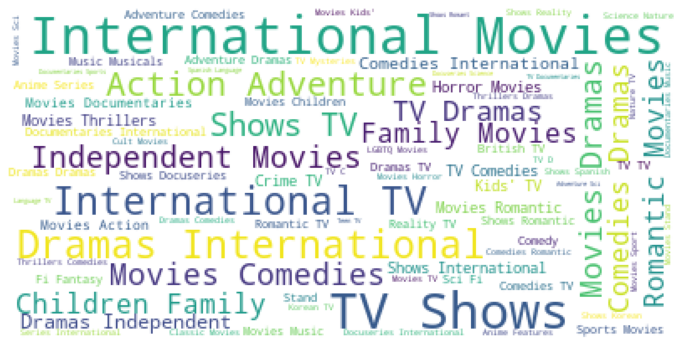

In [64]:
wordcloud = WordCloud(background_color = 'white', max_words = 80).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [86]:
top_20_countries.index

# try bubble charts 
#https://towardsdev.com/bubble-charts-in-python-8ed485e5bc96

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt', 'Turkey', 'Nigeria',
       'Australia', 'Taiwan', 'Indonesia', 'Brazil', 'Philippines',
       'United Kingdom, United States', 'United States, Canada', 'Germany'],
      dtype='object')

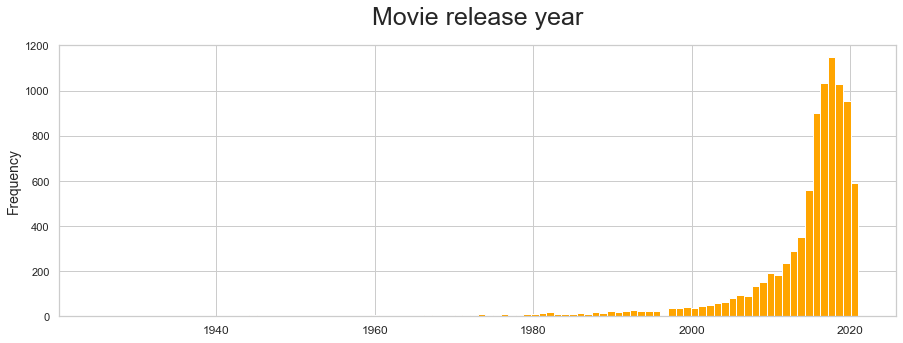

In [110]:
#release year
plt.xticks(fontsize=12)
plt.ylabel("Nb. of occurences", fontsize=14)
plt.title("Movie release year", fontsize=25, pad=20)
df["release_year"].plot.hist(figsize=(15,5), bins=100, color="orange");

In [ ]:
#date added



